In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Cleaned_Medicine_List_with_Alternatives.csv")

In [3]:
data

,Medicine Name,Composition,Use Case,Type,Drug Class
0,Dolo 650,Paracetamol 650mg,"Fever, Headache, Mild to Moderate Pain",Tablet,Analgesic / Antipyretic
1,Calpol,Paracetamol 500mg,"Fever, Body Ache, Cold-related Pain",Tablet / Syrup,Analgesic / Antipyretic
2,Crocin Advance,Paracetamol 500mg,"Fever, Headache, Mild Pain",Tablet,Analgesic / Antipyretic
3,Brufen,Ibuprofen 400mg,"Fever, Toothache, Muscle Pain",Tablet / Suspension,NSAID
4,Voveran,Diclofenac Sodium,"Arthritis, Joint Pain, Swelling",Tablet / Gel / Injection,NSAID
...,...,...,...,...,...
88,Domstal,Domperidone,"Vomiting, Gastric Fullness",Tablet / Suspension,Antiemetic (Prokinetic)
89,Ondem,Ondansetron,"Vomiting, Motion Sickness",Tablet / Syrup / Injection,Antiemetic (5-HT3 Antagonist)
90,Emeset,Ondansetron,"Nausea, Vomiting",Tablet / Oral Dispersible / Injection,Antiemetic (5-HT3 Antagonist)
91,Looz,Lactulose,"Constipation, Liver Cirrhosis",Syrup,Laxative (Lactulose)


In [8]:
data.isnull().sum()

Medicine Name    0
Composition      0
Use Case         0
Type             0
Drug Class       0
dtype: int64

In [10]:
data.dtypes.astype(str)

Medicine Name    object
Composition      object
Use Case         object
Type             object
Drug Class       object
dtype: object

C:\Users\satvi\AppData\Local\Temp\ipykernel_9144\1015416957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug Class", data=data, order=data["Drug Class"].value_counts().index, palette="viridis")


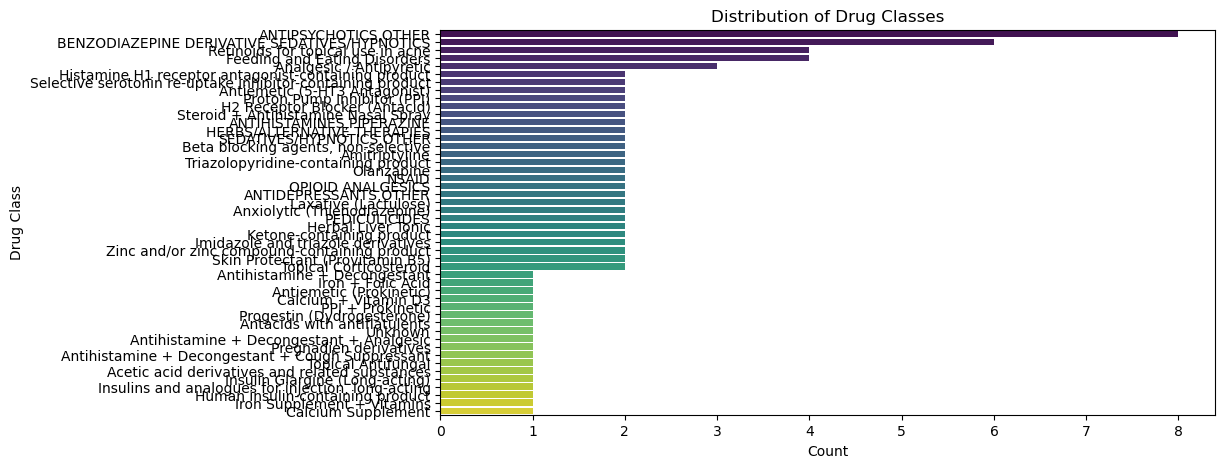

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y="Drug Class", data=data, order=data["Drug Class"].value_counts().index, palette="viridis")
plt.title("Distribution of Drug Classes")
plt.xlabel("Count")
plt.ylabel("Drug Class")
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_9144\715911699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Type", data=data, order=data["Type"].value_counts().index, palette="magma")


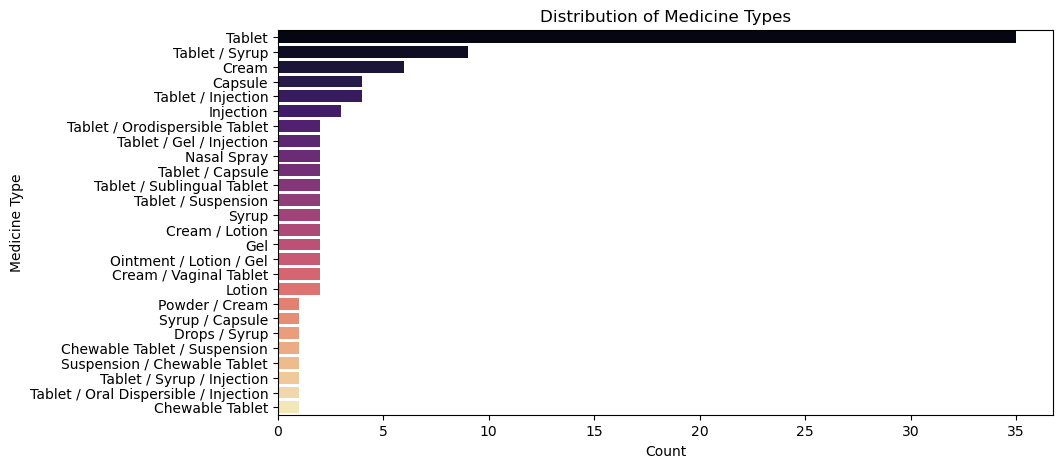

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y="Type", data=data, order=data["Type"].value_counts().index, palette="magma")
plt.title("Distribution of Medicine Types")
plt.xlabel("Count")
plt.ylabel("Medicine Type")
plt.show()

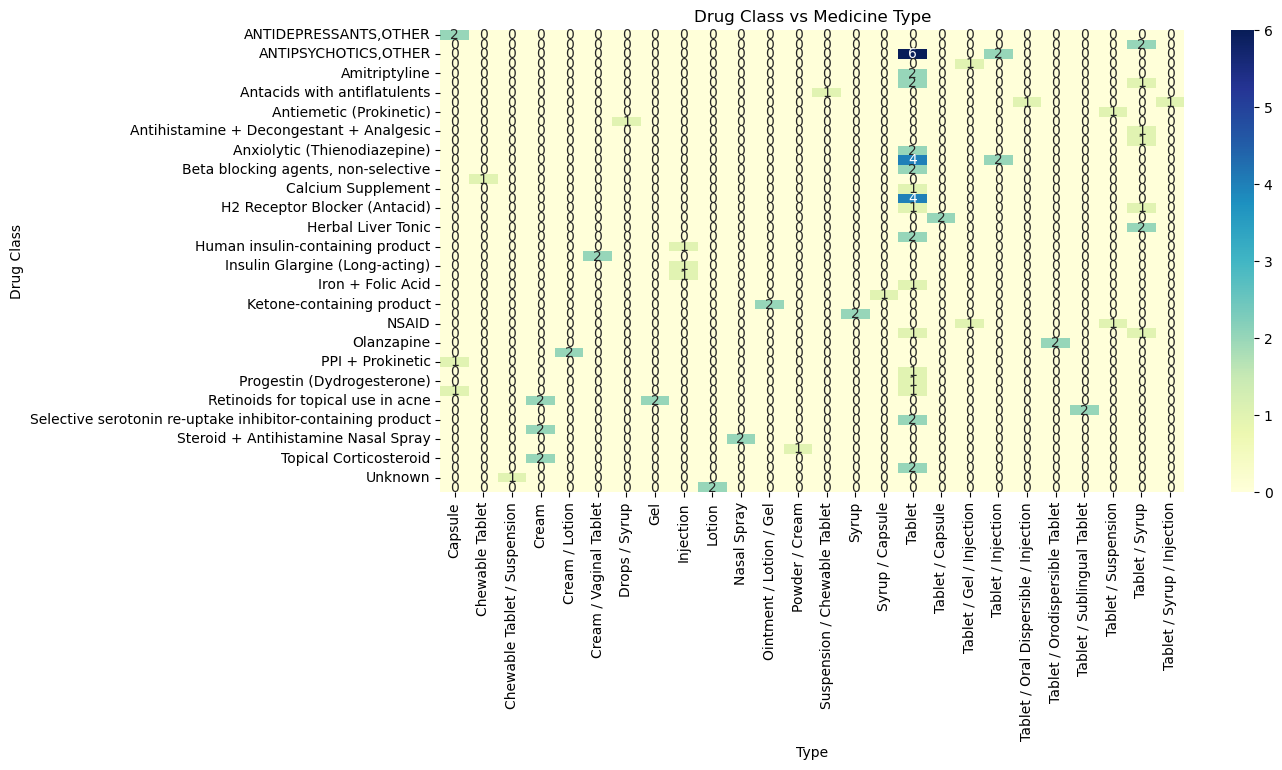

In [23]:
crosstab = pd.crosstab(data["Drug Class"], data["Type"])
plt.figure(figsize=(12,6))
sns.heatmap(crosstab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Drug Class vs Medicine Type")
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_18596\4049982503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='plasma')


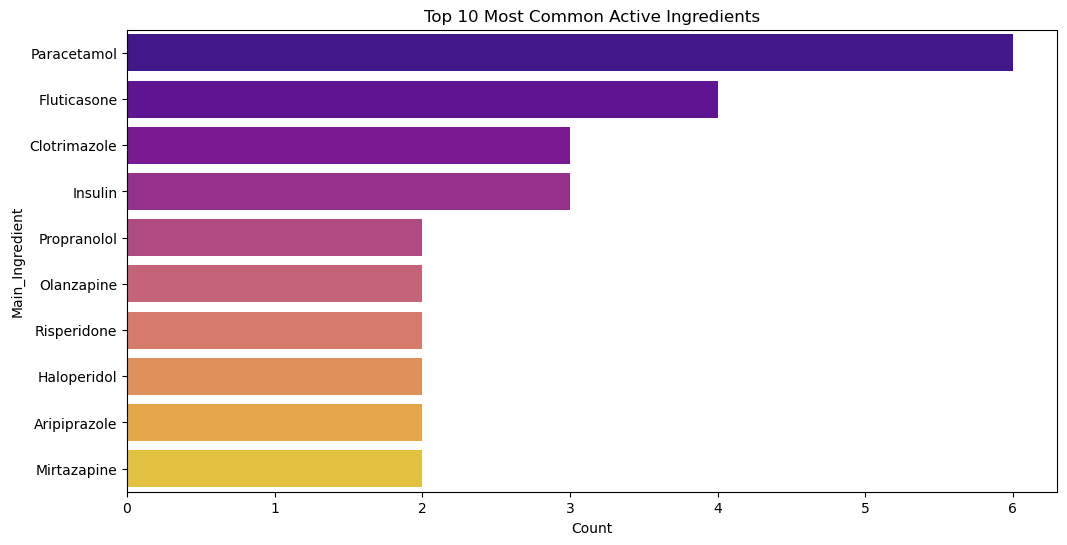

In [13]:
data['Main_Ingredient'] = data['Composition'].str.split().str[0]
plt.figure(figsize=(12, 6))
ingredient_counts = data['Main_Ingredient'].value_counts().head(10)
sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='plasma')
plt.title('Top 10 Most Common Active Ingredients')
plt.xlabel('Count')
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_18596\688457285.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=formulation_counts.values, y=formulation_counts.index, palette='coolwarm')


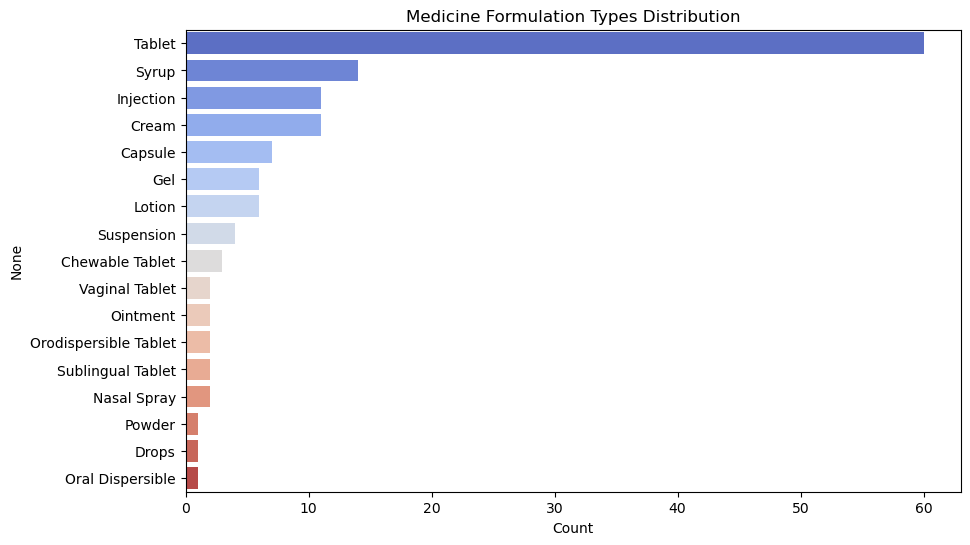

In [15]:
formulations = []
for form in data['Type']:
    forms = str(form).split(' / ')
    formulations.extend(forms)
formulation_counts = pd.Series(formulations).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=formulation_counts.values, y=formulation_counts.index, palette='coolwarm')
plt.title('Medicine Formulation Types Distribution')
plt.xlabel('Count')
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_18596\2766757666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Is_Generic', palette=['skyblue', 'lightcoral'])


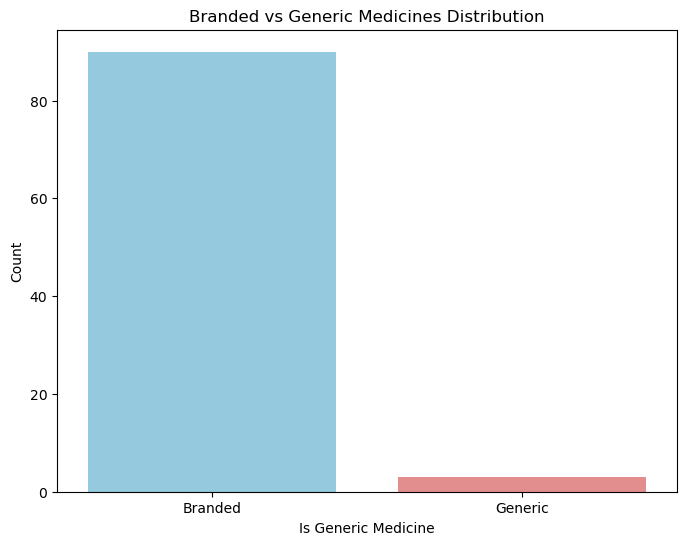

In [21]:
# Identify generic vs branded medicines
generic_keywords = ['paracetamol', 'ibuprofen', 'diclofenac', 'calcium', 'iron', 'vitamin']
data['Is_Generic'] = data['Medicine Name'].str.lower().isin([x.lower() for x in generic_keywords])

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Is_Generic', palette=['skyblue', 'lightcoral'])
plt.title('Branded vs Generic Medicines Distribution')
plt.xlabel('Is Generic Medicine')
plt.ylabel('Count')
plt.xticks([0, 1], ['Branded', 'Generic'])
plt.show()

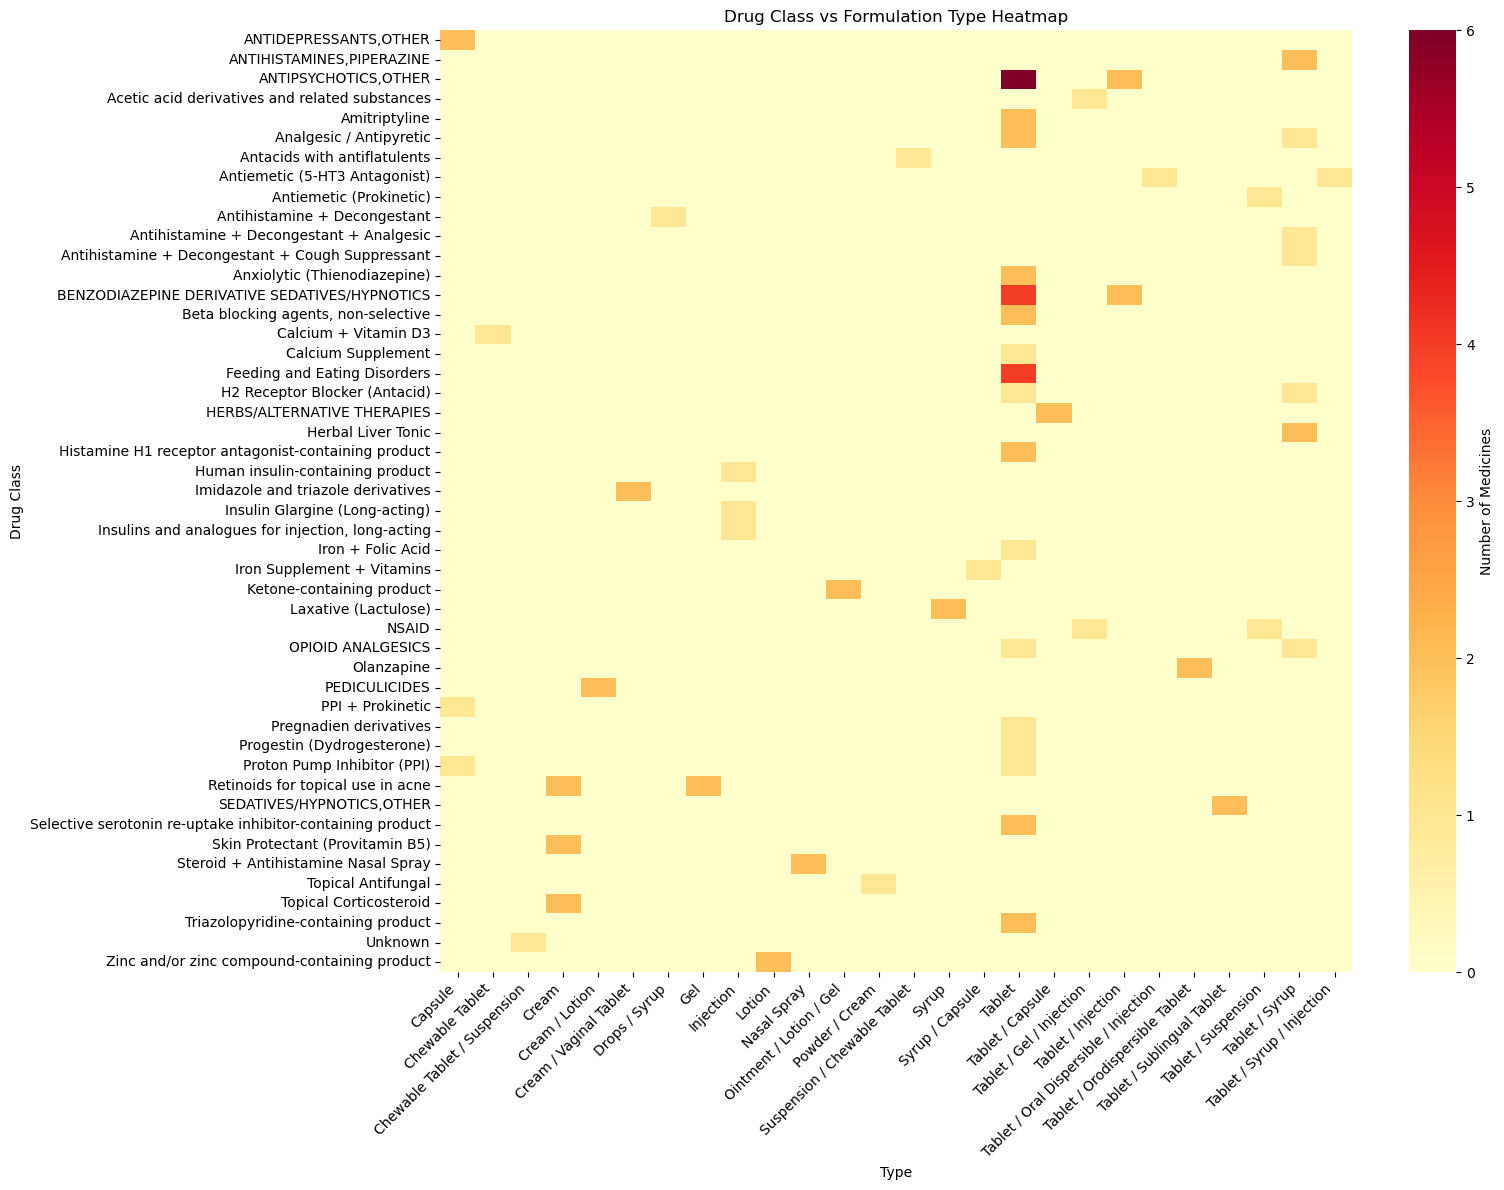

In [25]:
# Create cross-tabulation
cross_tab = pd.crosstab(data['Drug Class'], data['Type'])

plt.figure(figsize=(16, 12))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Number of Medicines'})
plt.title('Drug Class vs Formulation Type Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()